# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.132848e+01     6.737115e+00
 * time: 0.00452113151550293
     1     2.670884e+01     4.818636e+00
 * time: 0.013477087020874023
     2     1.902047e+01     4.744132e+00
 * time: 0.0340731143951416
     3     1.804257e+01     4.411047e+00
 * time: 0.05295395851135254
     4     1.197167e+01     1.929152e+00
 * time: 0.12247014045715332
     5     1.123075e+01     2.438495e+00
 * time: 0.13792014122009277
     6     1.034056e+01     1.346047e+00
 * time: 0.15320801734924316
     7     9.959322e+00     1.309459e+00
 * time: 0.16839814186096191
     8     9.640762e+00     1.030404e+00
 * time: 0.18372011184692383
     9     9.427165e+00     9.373014e-01
 * time: 0.1989150047302246
    10     9.214538e+00     1.134809e+00
 * time: 0.2140810489654541
    11     9.029897e+00     5.589378e-01
 * time: 0.2293109893798828
    12     8.995252e+00     1.098730e+00
 * time: 0.24106597900390625
    13     8.930682e+00     6.048405e-01
 * time: 0.

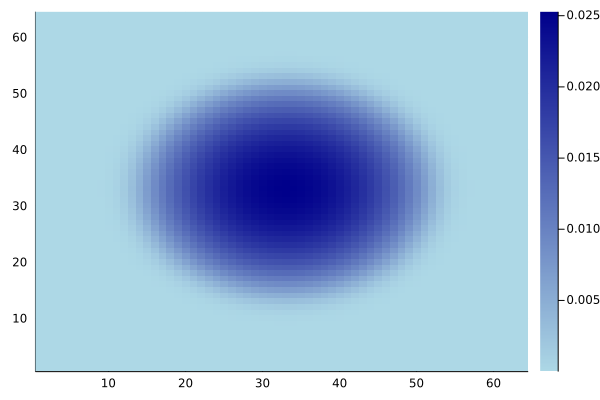

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)